# Planteamiento del problema de negocio

## PROBLEMA: Una empresa de e-commerce quiere entender la relación entre el presupuesto de publicidad digital en una sola plataforma (por ejemplo, Google Ads) y las ventas semanales.

# MODELO 1: LINEAR REGRESSION

Resolvemos este caso recogiendo datos o conjunto de datos llamado datasets donde aparecen los siguientes requisitos:
- El gasto semanal de costo por clic (Pay Per Click)
- Las ventas semanales acumulados por el PCP (Return of Investment)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Ecommerce.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

- El cliente nos ha dado este dataset:

In [ ]:
print(dataset)

   PCP Gasto Semanal  Ventas Semanal / Return of Investment
0              72.65                                 248.34
1              80.45                                 197.54
2              75.32                                 210.43
3              58.67                                 255.28
4              66.00                                 189.45
5              77.42                                 256.56
6              82.53                                 222.33
7              67.36                                 257.42
8              80.41                                 245.11


In [ ]:
print(X)
print(y)

[[72.65]
 [80.45]
 [75.32]
 [58.67]
 [66.  ]
 [77.42]
 [82.53]
 [67.36]
 [80.41]]
[248.34 197.54 210.43 255.28 189.45 256.56 222.33 257.42 245.11]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

El vendedor nos consulta a cuánto subiria la venta semanal teoricamente si su gasto de PCP es de 100 euros.

In [ ]:
regressor.predict([[100]])

array([211.83667137])

/tmp/ipython-input-949812482.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


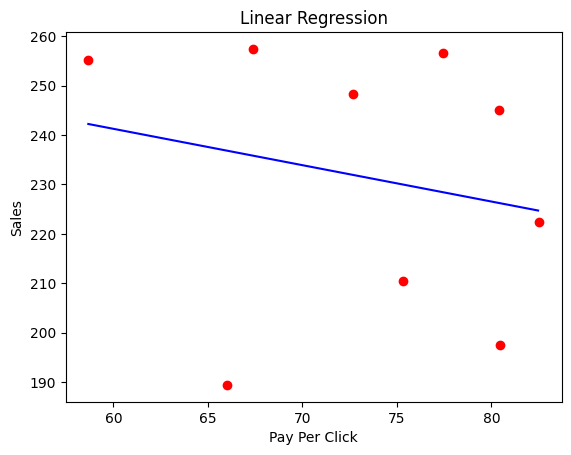

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Pay Per Click')
plt.ylabel('Sales')
plt.show()


Ahora en este caso, ¿es el problema del modelo o problema de datos que nos ha presentado? Yo diria que hay algún problema EXTERNA o hay problema en generación de leads dentro de su negocio. Es una regresión lineal, sí, pero inverso que le dice que su tiene gasto innecesario e injustificado en PCP que puede resultar a loss of sales. A lo mejor, tiene que enfocar e invertir en otro aspecto de su negocio.

## Los datos más bien tiende a estancarse o bajar. Esto confirma que con tan pocos datos y posibles outliers, el patrón no es fuerte. Por lo tanto, le ruego al cliente de cambiar o mejorar el dataset y ofrecerle mi ayuda para analizar las posibles relaciones lineares de las variables.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset2 = pd.read_csv('ECommerce2.csv')
X = dataset2.iloc[:, :-1].values
y = dataset2.iloc[:, -1].values

In [2]:
print(X)
print(y)

[[ 50]
 [ 55]
 [ 60]
 [ 65]
 [ 70]
 [ 75]
 [ 80]
 [ 85]
 [ 90]
 [ 95]
 [100]
 [105]
 [110]
 [115]
 [120]
 [125]
 [130]
 [135]
 [140]
 [145]]
[180 190 200 210 220 230 235 240 242 243 242 240 238 235 230 225 220 215
 210 205]


In [3]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [4]:
regressor.predict([[200]])

array([241.11954887])

In [5]:
regressor.predict([[145]])

array([231.12857143])

Ahora sí, yo y el cliente analizamos juntos la relación entre su gasto en PCP (Pay per Click) y las ventas semanales (Weekly Return of Investment). Utilizando una regresión simple nos da este gráfico:

/tmp/ipython-input-406533113.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


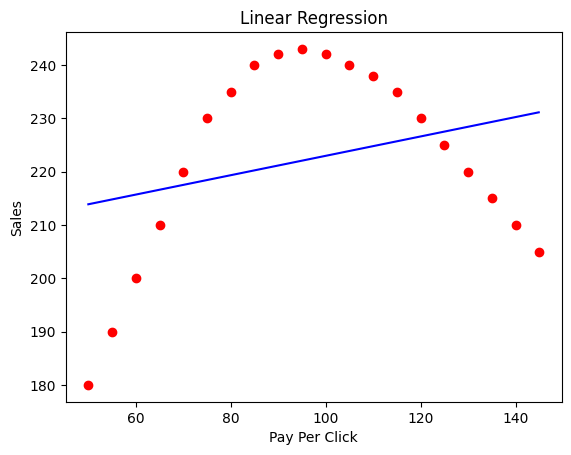

In [6]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Pay Per Click')
plt.ylabel('Sales')
plt.show()

Vamos a comparar este modelo con otros modelos de regresión: Multilinear Regression, Polynomial Regression, Support Vector Regression, Decision Tree Regression y Random Forest Tree Regression.

In [7]:
from sklearn.metrics import r2_score
r2_score(y, regressor.predict(X))

0.08412750938840707

### Nos da una evaluación de: 0.08412750938840707. Lo que nos indica una mala evaluación.

# MODELO 2: MULTILINEAR REGRESSION

In [8]:
print(X)
print(y)

[[ 50]
 [ 55]
 [ 60]
 [ 65]
 [ 70]
 [ 75]
 [ 80]
 [ 85]
 [ 90]
 [ 95]
 [100]
 [105]
 [110]
 [115]
 [120]
 [125]
 [130]
 [135]
 [140]
 [145]]
[180 190 200 210 220 230 235 240 242 243 242 240 238 235 230 225 220 215
 210 205]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[239.01 210.  ]
 [212.9  190.  ]
 [240.54 205.  ]
 [223.65 242.  ]]


In [12]:
print(regressor.predict([[300]]))

[288.14]


/tmp/ipython-input-406533113.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


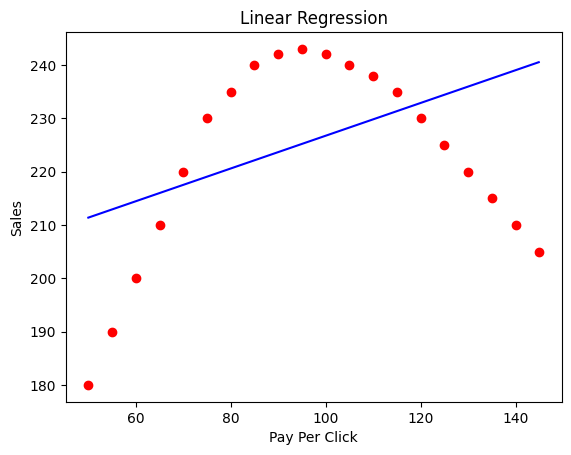

In [13]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Pay Per Click')
plt.ylabel('Sales')
plt.show()

In [16]:
r2_score(y, regressor.predict(X))

0.007408243666749081

### Este modelo de regresión linear multiple nos indica también que tenemos una MALA EVALUACIÓN.

# MODELO 3: POLYNOMIAL REGRESSION

In [17]:
print(X)
print(y)

[[ 50]
 [ 55]
 [ 60]
 [ 65]
 [ 70]
 [ 75]
 [ 80]
 [ 85]
 [ 90]
 [ 95]
 [100]
 [105]
 [110]
 [115]
 [120]
 [125]
 [130]
 [135]
 [140]
 [145]]
[180 190 200 210 220 230 235 240 242 243 242 240 238 235 230 225 220 215
 210 205]


In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) ## aquí ponemos el grado (potenciador o exponente)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

/tmp/ipython-input-496257013.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


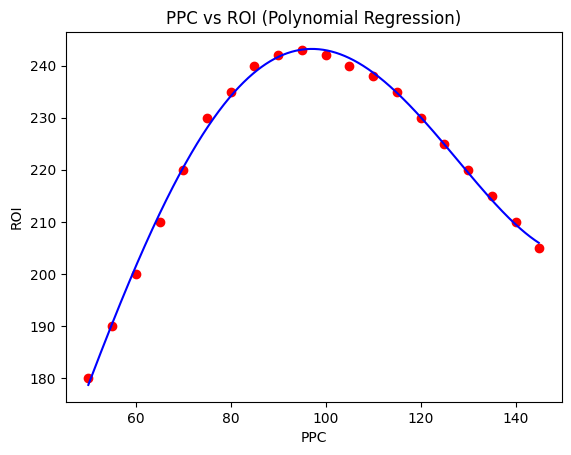

In [19]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('PPC vs ROI (Polynomial Regression)')
plt.xlabel('PPC')
plt.ylabel('ROI')
plt.show()

In [20]:
r2_score(y, lin_reg_2.predict(poly_reg.fit_transform(X)))

0.9971621267301004

### SEGÚN AL RULE OF THUMB NOS DA UNA EVALUACIÓN QUE APROXIMA AL 1. SIGNIFICA QUE TENEMOS UN MODELO ADECUADO PARA NUESTRO DATASET. PERO SEGUIMOS AVANZANDO Y COMPARANDO SI HUBIERA MÁS ADECUADO QUE ESTE.

# MODELO 4: SUPPORT VECTOR REGRESSION

In [22]:
y = y.reshape(len(y), 1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [24]:
print(X)

[[-1.65]
 [-1.47]
 [-1.3 ]
 [-1.13]
 [-0.95]
 [-0.78]
 [-0.61]
 [-0.43]
 [-0.26]
 [-0.09]
 [ 0.09]
 [ 0.26]
 [ 0.43]
 [ 0.61]
 [ 0.78]
 [ 0.95]
 [ 1.13]
 [ 1.3 ]
 [ 1.47]
 [ 1.65]]


In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

/tmp/ipython-input-392967555.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


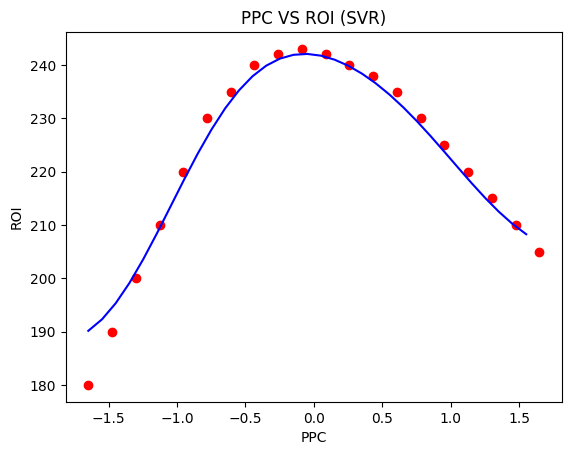

In [30]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.title('PPC VS ROI (SVR)')
plt.xlabel('PPC')
plt.ylabel('ROI')
plt.show()

In [31]:
r2_score(y, regressor.predict(X))

0.9750481678629016

### AHORA, TENEMOS UN MÓDELO MEJOR QUE EL DE ANTERIOR. PERO SEGUIMOS ADELANTE.

# MODELO 5: DECISION TREE REGRESSION

In [32]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [34]:
print(X)
print(y)

[[-1.65]
 [-1.47]
 [-1.3 ]
 [-1.13]
 [-0.95]
 [-0.78]
 [-0.61]
 [-0.43]
 [-0.26]
 [-0.09]
 [ 0.09]
 [ 0.26]
 [ 0.43]
 [ 0.61]
 [ 0.78]
 [ 0.95]
 [ 1.13]
 [ 1.3 ]
 [ 1.47]
 [ 1.65]]
[[-2.35]
 [-1.8 ]
 [-1.25]
 [-0.69]
 [-0.14]
 [ 0.42]
 [ 0.69]
 [ 0.97]
 [ 1.08]
 [ 1.14]
 [ 1.08]
 [ 0.97]
 [ 0.86]
 [ 0.69]
 [ 0.42]
 [ 0.14]
 [-0.14]
 [-0.42]
 [-0.69]
 [-0.97]]


In [37]:
## hemos aplicado FEATURE SCALING por tanto los datos ha cambiado

dataset3 = pd.read_csv('ECommerce2.csv')
X = dataset3.iloc[:, :-1].values
y = dataset3.iloc[:, -1].values

print(X)
print(y)

[[ 50]
 [ 55]
 [ 60]
 [ 65]
 [ 70]
 [ 75]
 [ 80]
 [ 85]
 [ 90]
 [ 95]
 [100]
 [105]
 [110]
 [115]
 [120]
 [125]
 [130]
 [135]
 [140]
 [145]]
[180 190 200 210 220 230 235 240 242 243 242 240 238 235 230 225 220 215
 210 205]


In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [39]:
print(X)
print(y)

[[ 50]
 [ 55]
 [ 60]
 [ 65]
 [ 70]
 [ 75]
 [ 80]
 [ 85]
 [ 90]
 [ 95]
 [100]
 [105]
 [110]
 [115]
 [120]
 [125]
 [130]
 [135]
 [140]
 [145]]
[180 190 200 210 220 230 235 240 242 243 242 240 238 235 230 225 220 215
 210 205]


In [40]:
regressor.predict([[300]])

array([205.])

/tmp/ipython-input-1138772011.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X),max(X),0.1)


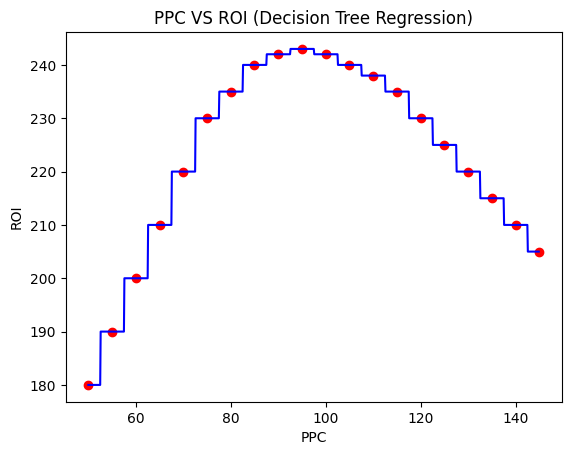

In [41]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color = 'red')
plt.plot(X_grid,regressor.predict(X_grid),color = 'blue')
plt.title('PPC VS ROI (Decision Tree Regression)')
plt.xlabel('PPC')
plt.ylabel('ROI')
plt.show()


In [42]:
r2_score(y, regressor.predict(X))

1.0

### LA EVALUACIÓN SE ACERCA PERFECTAMENTE AL UNO. SIGNIFICA QUE EL MODELO ES SOSPECHOSO. EL MEJOR SIGUE EL TERCERO: SUPPORT VECTOR MODEL.

# MODELO 6: RANDOM FOREST REGRESSION

In [43]:
print(X)
print(y)

[[ 50]
 [ 55]
 [ 60]
 [ 65]
 [ 70]
 [ 75]
 [ 80]
 [ 85]
 [ 90]
 [ 95]
 [100]
 [105]
 [110]
 [115]
 [120]
 [125]
 [130]
 [135]
 [140]
 [145]]
[180 190 200 210 220 230 235 240 242 243 242 240 238 235 230 225 220 215
 210 205]


In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)


RandomForestRegressor(n_estimators=10, random_state=0)

In [45]:
regressor.predict([[300]])

array([209.])

/tmp/ipython-input-2928173307.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


Text(0, 0.5, 'ROI')

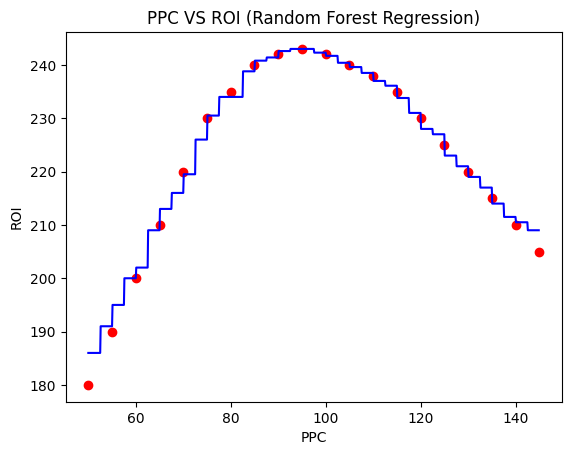

In [46]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('PPC VS ROI (Random Forest Regression)')
plt.xlabel('PPC')
plt.ylabel('ROI')

In [47]:
r2_score(y, regressor.predict(X))

0.9842416807238153

### 0.97 (EVALUACIÓN DE SVR) ES MEJOR QUE LA EVALUACIÓN DE RANDOM FOREST.

# CONCLUSIÓN: Para concluir, utilizamos el modelo de regresión Random Forest para los datasets del vendedor y para predecir los posibles return of investment en cada pay per click.